# Growth Rate Comparisons
We need to compare growth rate estimates to DMS data, EVE(scape) data, and Bloom lab fitness data.

In [150]:
import pandas as pd
import numpy as np
from datetime import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

## Read in data

#### PyR0

In [53]:
pyrofile = '../data/processed/PyR0_Ranked_Mutations.tsv'
pyro = pd.read_csv(pyrofile, sep='\t').rename(columns={'mutation':'Mutation'})
pyro['Gene'] = pyro['Mutation'].apply(lambda x: x.split(':')[0])
pyro['Mutation'] = pyro['Mutation'].apply(lambda x: x.split(':')[1])
print('{:,.0f} rows'.format(len(pyro)))
pyro.head()

138,186 rows


,rank,Mutation,mean/stddev,log10(P(ΔR > 1)),Δ log R,Δ log R 95% ci lower,Δ log R 95% ci upper,R / R_A,R / R_A 95% ci lower,R / R_A 95% ci upper,emerged in lineages,Run date,Gene
0,1,R346K,4611.43,4617700.0,0.094890,0.094850,0.094930,1.09954,1.09949,1.09958,"A.30, AY.33.2 (B.1.617.2.33.2), B.1.415.1, B.1...",2021-03-12,S
1,2,D3N,3843.02,3207010.0,0.120831,0.120769,0.120892,1.12843,1.12836,1.12850,"B.1.1.529, BA.2 (B.1.1.529.2), BA.5 (B.1.1.529...",2021-03-12,M
2,3,F486V,3180.00,2195890.0,0.116173,0.116101,0.116245,1.12319,1.12311,1.12327,"B.1.1.529, BA.2 (B.1.1.529.2), BA.4 (B.1.1.529...",2021-03-12,S
3,4,L452Q,3034.55,1999600.0,0.095844,0.095782,0.095906,1.10059,1.10052,1.10066,"B.1.1.374, BA.2.12.1 (B.1.1.529.2.12.1), BG.1 ...",2021-03-12,S
4,5,D16G,2997.79,1951450.0,0.100566,0.100500,0.100631,1.10580,1.10572,1.10587,"B.1, B.1.1.529, B.1.631, BA.5 (B.1.1.529.5), B...",2021-03-12,ORF9b


#### BVAS

In [77]:
bvasfile = '../data/processed/BVAS_Ranked_Mutations.tsv'
bvas = pd.read_csv(bvasfile, sep='\t').rename(columns={'Unnamed: 0':'Mutation'})
bvas['Gene'] = bvas['Mutation'].apply(lambda x: x.split(':')[0])
bvas['Mutation'] = bvas['Mutation'].apply(lambda x: x.split(':')[1])
print('{:,.0f} rows'.format(len(bvas)))
bvas.head()

128,212 rows


,Mutation,PIP,Beta,BetaStd,ConditionalBeta,ConditionalBetaStd,Rank,Run date,Gene
0,L452R,1.0,0.391635,0.055664,0.391635,0.055664,1,2021-03-12,S
1,R346T,1.0,0.595724,0.039951,0.595724,0.039951,2,2021-03-12,S
2,R346K,1.0,0.351070,0.023070,0.351070,0.023070,3,2021-03-12,S
3,L452Q,1.0,0.483694,0.053569,0.483694,0.053569,4,2021-03-12,S
4,L452M,1.0,0.462981,0.049651,0.462981,0.049651,5,2021-03-12,S


#### EVE(scape)

In [18]:
evescapefile = '../data/processed/EVEscape_Ranked_Mutations.tsv'
evescape = pd.read_csv(evescapefile, sep='\t')
print('{:,.0f} rows'.format(len(evescape)))
evescape.head()

24,187 rows


,Mutation,Rank,Position,evescape,evescape_pre2020,eve,eve_pre2020
0,M1Q,10460,1,-2.126689,-2.126689,NaN,NaN
1,M1A,14012,1,-2.437632,-2.437632,NaN,NaN
2,M1K,6871,1,-1.794220,-1.794220,NaN,NaN
3,M1D,7701,1,-1.871061,-1.871061,NaN,NaN
4,M1T,12298,1,-2.287015,-2.287015,NaN,NaN


## Bloom Fitness

In [54]:
bloomfile = '../data/processed/Bloom_Ranked_Mutations.tsv'
bloom = pd.read_csv(bloomfile, sep='\t')
bloom.head()

,Gene,Position,Mutation,delta_fitness,Rank
0,M,82,T82P,6.1665,0
1,ORF8,121,I121L,5.8075,1
2,ORF8,4,L4R,4.8731,2
3,S,452,L452R,4.6349,3
4,ORF3a,70,Q70P,4.5421,4


## DMS

In [21]:
dmsfile = '../data/processed/DMS_Mutations.tsv'
dms = pd.read_csv(dmsfile, sep='\t')
dms.head()

,Position,Mutation,ACE2 Binding,Expression
0,331,N331A,-0.03,-0.11
1,331,N331C,-0.09,-1.26
2,331,N331D,0.03,-0.44
3,331,N331E,0.00,-0.31
4,331,N331F,-0.10,-0.70


## Make summary plots using most recent PyR0 and BVAS data

In [78]:
def get_most_recent(df):
    df['Run date'] = pd.to_datetime(df['Run date'])
    most_recent_date = max(df['Run date'])
    return df[df['Run date'] == most_recent_date]

pyro_recent = get_most_recent(pyro)
bvas_recent = get_most_recent(bvas)

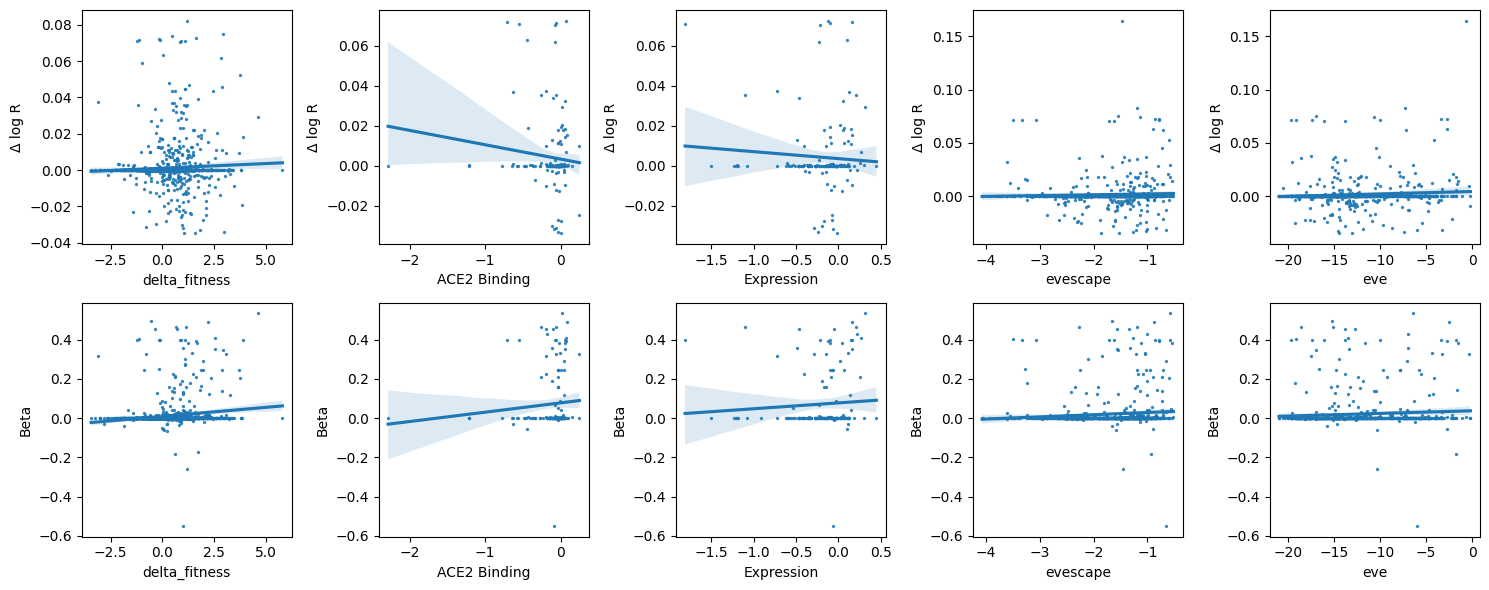

In [85]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

ax = axes[0]
# PyR0 Bloom
sns.regplot(x='delta_fitness',
            y='Δ log R',
            data=pd.merge(pyro_recent, bloom, on=['Mutation', 'Gene']),
            scatter_kws={'s':2},
            ax=ax)

ax = axes[1]
# PyR0 ACE2
sns.regplot(x='ACE2 Binding',
            y='Δ log R',
            data=pd.merge(pyro_recent, dms, on='Mutation'),
            scatter_kws={'s':2},
            ax=ax)

ax = axes[2]
# PyR0 Expression
sns.regplot(x='Expression',
            y='Δ log R',
            data=pd.merge(pyro_recent, dms, on='Mutation'),
            scatter_kws={'s':2},
            ax=ax)

ax = axes[3]
# PyR0 EVEscape
sns.regplot(x='evescape',
            y='Δ log R',
            data=pd.merge(pyro_recent, evescape, on='Mutation'),
            scatter_kws={'s':2},
            ax=ax)

ax = axes[4]
# PyR0 EVE
sns.regplot(x='eve',
            y='Δ log R',
            data=pd.merge(pyro_recent, evescape, on='Mutation'),
            scatter_kws={'s':2},
            ax=ax)

ax = axes[5]
# BVAS Bloom
sns.regplot(x='delta_fitness',
            y='Beta',
            data=pd.merge(bvas_recent, bloom, on=['Mutation', 'Gene']),
            scatter_kws={'s':2},
            ax=ax)

ax = axes[6]
# BVAS ACE2
sns.regplot(x='ACE2 Binding',
            y='Beta',
            data=pd.merge(bvas_recent, dms, on='Mutation'),
            scatter_kws={'s':2},
            ax=ax)

ax = axes[7]
# BVAS Expression
sns.regplot(x='Expression',
            y='Beta',
            data=pd.merge(bvas_recent, dms, on='Mutation'),
            scatter_kws={'s':2},
            ax=ax)

ax = axes[8]
# BVAS EVEscape
sns.regplot(x='evescape',
            y='Beta',
            data=pd.merge(bvas_recent, evescape, on='Mutation'),
            scatter_kws={'s':2},
            ax=ax)

ax = axes[9]
# BVAS EVE
sns.regplot(x='eve',
            y='Beta',
            data=pd.merge(bvas_recent, evescape, on='Mutation'),
            scatter_kws={'s':2},
            ax=ax)



fig.tight_layout()

## Correlation over time

#### PyR0

In [102]:
pyro_spike = pyro[pyro['Gene']=='S']
pyro_pivot = pyro_spike[['Mutation', 'Δ log R', 'Run date']].pivot(columns='Run date', values='Δ log R', index='Mutation').reset_index()
pyro_dms = pd.merge(pyro_pivot, dms, on='Mutation', how='inner')

In [176]:
z = pyro_dms.corr()['ACE2 Binding']
z = np.array([[x,y] for (x,y) in z.items() if isinstance(x, dt)])

ace2_corr = {'Feature':'ACE2 Binding',
             'Date':z[:,0],
             'Correlation':z[:,1]}

z = pyro_dms.corr()['Expression']
z = np.array([[x,y] for (x,y) in z.items() if isinstance(x, dt)])

expr_corr = {'Feature':'Expression',
             'Date':z[:,0],
             'Correlation':z[:,1]}

C:\Users\blk18\AppData\Local\Temp\ipykernel_11688\4122676242.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  z = pyro_dms.corr()['ACE2 Binding']
C:\Users\blk18\AppData\Local\Temp\ipykernel_11688\4122676242.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  z = pyro_dms.corr()['Expression']


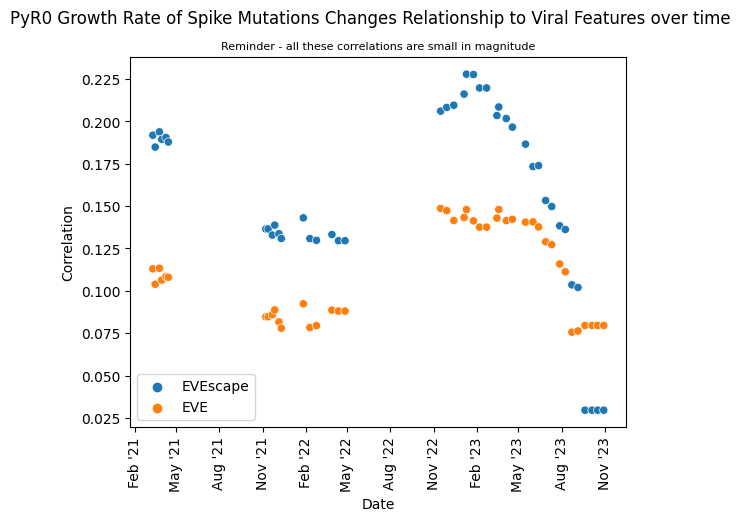

In [190]:
fig, ax = plt.subplots()
sns.scatterplot(x='Date',
                y='Correlation',
                hue='Feature',
                data=pd.concat([pd.DataFrame(ace2_corr), pd.DataFrame(expr_corr)]),
                ax=ax)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b '%y"))
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

ax.legend(loc='lower left')

fig.suptitle('PyR0 Growth Rate of Spike Mutations Changes Relationship to Viral Features over time');
ax.set_title('Reminder - all these correlations are small in magnitude', fontsize=8);

fig.savefig('../figs/Correlations-Over-Time/PyR0_DMS.png', dpi=150)

In [180]:
pyro_eve = pd.merge(pyro_pivot, evescape, on='Mutation', how='inner')

In [183]:
z = pyro_eve.corr()['evescape']
z = np.array([[x,y] for (x,y) in z.items() if isinstance(x, dt)])

evescape_corr = {'Feature':'EVEscape',
             'Date':z[:,0],
             'Correlation':z[:,1]}

z = pyro_eve.corr()['eve']
z = np.array([[x,y] for (x,y) in z.items() if isinstance(x, dt)])

eve_corr = {'Feature':'EVE',
             'Date':z[:,0],
             'Correlation':z[:,1]}

C:\Users\blk18\AppData\Local\Temp\ipykernel_11688\2662848993.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  z = pyro_eve.corr()['evescape']
C:\Users\blk18\AppData\Local\Temp\ipykernel_11688\2662848993.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  z = pyro_eve.corr()['eve']


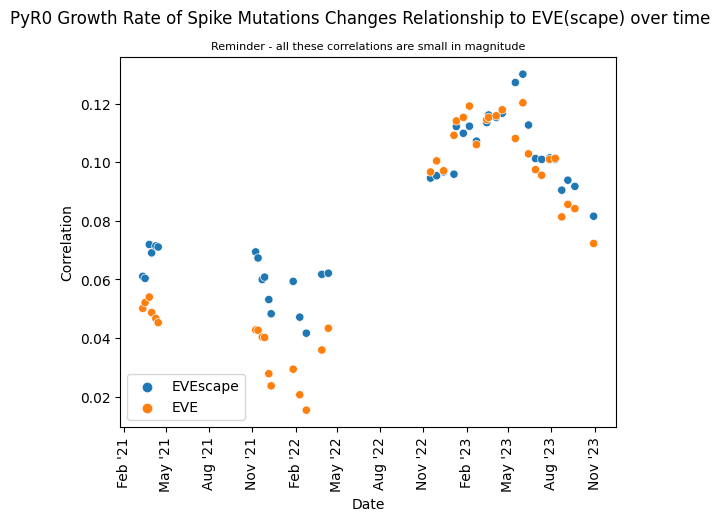

In [191]:
fig, ax = plt.subplots()
sns.scatterplot(x='Date',
                y='Correlation',
                hue='Feature',
                data=pd.concat([pd.DataFrame(evescape_corr), pd.DataFrame(eve_corr)]),
                ax=ax)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b '%y"))
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

ax.legend(loc='lower left')

fig.suptitle('PyR0 Growth Rate of Spike Mutations Changes Relationship to EVE(scape) over time');
ax.set_title('Reminder - all these correlations are small in magnitude', fontsize=8);

fig.savefig('../figs/Correlations-Over-Time/PyR0_EVEscape.png', dpi=150)

#### BVAS

In [174]:
bvas_spike = bvas[bvas['Gene']=='S']
bvas_pivot = bvas_spike[['Mutation', 'Beta', 'Run date']].pivot(columns='Run date', values='Beta', index='Mutation').reset_index()
bvas_dms = pd.merge(bvas_pivot, dms, on='Mutation', how='inner')

In [177]:
z = bvas_dms.corr()['ACE2 Binding']
z = np.array([[x,y] for (x,y) in z.items() if isinstance(x, dt)])

ace2_corr = {'Feature':'ACE2 Binding',
             'Date':z[:,0],
             'Correlation':z[:,1]}

z = bvas_dms.corr()['Expression']
z = np.array([[x,y] for (x,y) in z.items() if isinstance(x, dt)])

expr_corr = {'Feature':'Expression',
             'Date':z[:,0],
             'Correlation':z[:,1]}

C:\Users\blk18\AppData\Local\Temp\ipykernel_11688\2147011676.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  z = bvas_dms.corr()['ACE2 Binding']
C:\Users\blk18\AppData\Local\Temp\ipykernel_11688\2147011676.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  z = bvas_dms.corr()['Expression']


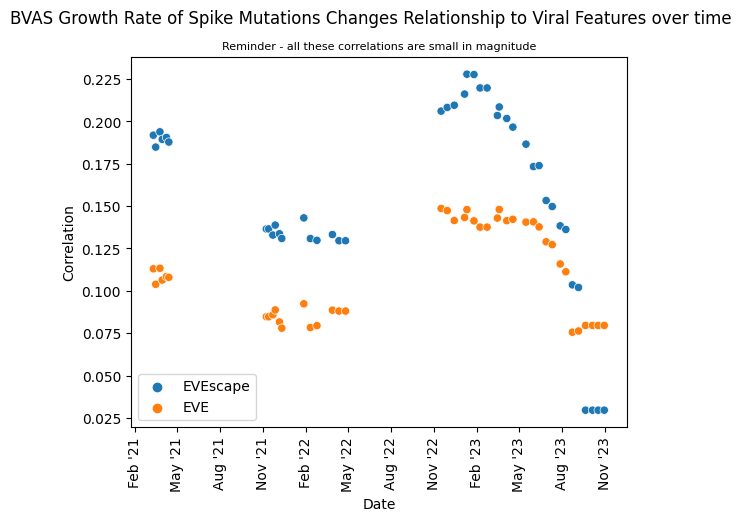

In [192]:
fig, ax = plt.subplots()
sns.scatterplot(x='Date',
                y='Correlation',
                hue='Feature',
                data=pd.concat([pd.DataFrame(ace2_corr), pd.DataFrame(expr_corr)]),
                ax=ax)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b '%y"))
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

ax.legend(loc='lower left')

fig.suptitle('BVAS Growth Rate of Spike Mutations Changes Relationship to Viral Features over time');
ax.set_title('Reminder - all these correlations are small in magnitude', fontsize=8);

fig.savefig('../figs/Correlations-Over-Time/BVAS_DMS.png', dpi=150)

In [186]:
bvas_eve = pd.merge(bvas_pivot, evescape, on='Mutation', how='inner')

In [187]:
z = bvas_eve.corr()['evescape']
z = np.array([[x,y] for (x,y) in z.items() if isinstance(x, dt)])

evescape_corr = {'Feature':'EVEscape',
             'Date':z[:,0],
             'Correlation':z[:,1]}

z = bvas_eve.corr()['eve']
z = np.array([[x,y] for (x,y) in z.items() if isinstance(x, dt)])

eve_corr = {'Feature':'EVE',
             'Date':z[:,0],
             'Correlation':z[:,1]}

C:\Users\blk18\AppData\Local\Temp\ipykernel_11688\1234790421.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  z = bvas_eve.corr()['evescape']
C:\Users\blk18\AppData\Local\Temp\ipykernel_11688\1234790421.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  z = bvas_eve.corr()['eve']


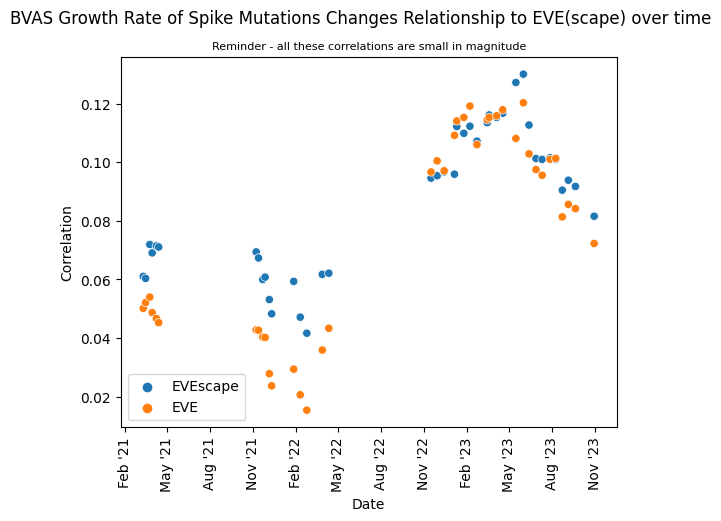

In [193]:
fig, ax = plt.subplots()
sns.scatterplot(x='Date',
                y='Correlation',
                hue='Feature',
                data=pd.concat([pd.DataFrame(evescape_corr), pd.DataFrame(eve_corr)]),
                ax=ax)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b '%y"))
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

ax.legend(loc='lower left')

fig.suptitle('BVAS Growth Rate of Spike Mutations Changes Relationship to EVE(scape) over time');
ax.set_title('Reminder - all these correlations are small in magnitude', fontsize=8);

fig.savefig('../figs/Correlations-Over-Time/BVAS_EVEscape.png', dpi=150)